# Знакомство с pytorch (5 баллов)

Отвечал на вопросы + доп. баллы (4 штуки)

In [4]:
import torch
import numpy as np

In [5]:
pip install scikit-learn

In [6]:
# numpy world

x = np.arange(16).reshape(4, 4)

print("X :\n %s" % x)
print("add 5 :\n%s" % (x + 5))
print("X*X^T  :\n", np.dot(x, x.T))
print("mean over cols :\n%s" % (x.mean(axis=-1)))
print("cumsum of cols :\n%s" % (np.cumsum(x, axis=0)))

X :
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
add 5 :
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]
X*X^T  :
 [[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]
mean over cols :
[ 1.5  5.5  9.5 13.5]
cumsum of cols :
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]


In [7]:
# pytorch world

x = np.arange(16).reshape(4, 4)

x = torch.from_numpy(x).type(torch.FloatTensor) #or torch.arange(0,16).view(4,4)

print("X :\n%s" % x)
print("add 5 :\n%s" % (x + 5))
print("X*X^T  :\n", torch.matmul(x, x.transpose(1, 0)))
print("mean over cols :\n", torch.mean(x, dim=-1))
print("cumsum of cols :\n", torch.cumsum(x, dim=0))

X :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
add 5 :
tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X*X^T  :
 tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
mean over cols :
 tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
cumsum of cols :
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


## NumPy vs Pytorch

Numpy и Pytorch не требуют описания статического графа вычислений.

Можно отлаживаться с помощью pdb или просто print.

API несколько различается:

```
x.reshape([1,2,8]) -> x.view(1,2,8)
x.sum(axis=-1) -> x.sum(dim=-1)
x.astype('int64') -> x.type(torch.int64)
```


Легко конвертировать между собой:

```
torch.from_numpy(npx) -- вернет Tensor
tt.numpy() -- вернет Numpy Array
```

Преобразовать тензор из одного числа в обычное питоновское число:
```
torch.tensor([1]).item() -> 1
```


Если что:
- смотрите документацию https://pytorch.org/docs/
- гуглите (Stackoverflow/tutorials)

Давайте кое что посчитаем

$$ x(t) = t - 1.5 * cos( 15 t) $$
$$ y(t) = t - 1.5 * sin( 16 t) $$


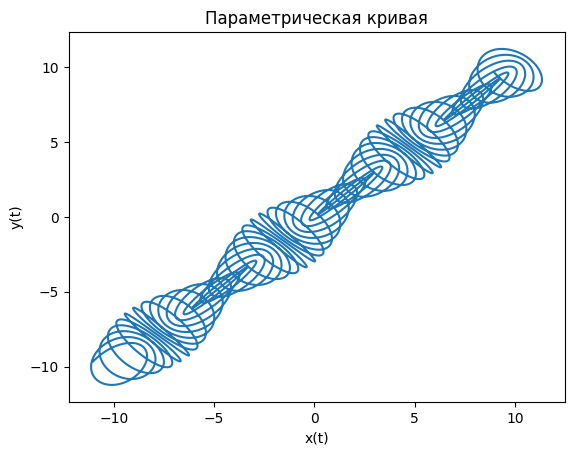

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

t = torch.linspace(-10, 10, steps = 10000)

x_t = t - 1.5 * torch.cos(15 * t)
y_t = t - 1.5 * torch.sin(16 * t)

plt.plot(x_t.numpy(), y_t.numpy())
plt.title("Параметрическая кривая")
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.show()

# Automatic gradients

У каждого тензора в Pytorch есть флаг `requires_grad`, который отвечает за автоматическое вычисление градиентов:

1. Создать переменную: `a = torch.tensor(..., requires_grad=True)`

2. Определить какую-нибудь дифференцируемую функцию `loss = whatever(a)`

3. Запросить обратный проход `loss.backward()`

4. Градиенты будут доступны в `a.grads`


Есть два важных отличия Pytorch от Theano/TF:

1. Функцию ошибки можно изменять динамически, например на каждом минибатче.

2. После вычисления `.backward()` градиенты сохраняются в `.grad` каждой задействованной переменной, при повторных вызовах градиенты суммируются. Это позволяет использовать несколько функций ошибок или виртуально увеличивать batch_size. Поэтому, после каждого шага оптимизатора градиенты стоит обнулять.



## Leaf vs Non-leaf Variable:
```
x = torch.tensor([1., 2., 3., 4.], requires_grad=True))  # leaf tensor
y = x + 1  # not a leaf variable
```

Градиенты будут сохранены и доступны для использования только для `leaf tensor`.
Такое поведение по-умолчанию сделано ради экономии памяти. Все тензоры с флагом `requires_grad = False` считаются`leaf tensors` по умолчанию.


Обратите внимание, что вычисление градиентов работает только для тензоров с вещественным типом данных:

In [ ]:
# will not work
#x = torch.tensor([1, 2, 3, 4], requires_grad=True)


Чтобы выставить флаг `requires_grad=False` и выключить автоматическое вычисление градиентов для нескольких тензоров, можно использовать `with torch.no_grad()` или `detach`:

In [9]:
x = torch.tensor([1.], requires_grad=True)
y = x**2
print(x.requires_grad)
print(y.requires_grad)

with torch.no_grad():
    z = torch.exp(x)
    print(z.requires_grad)

# detach from the graph
w = torch.log(x).detach()
print(w.requires_grad)

True
True
False
False


Рассмотрим пример линейной регрессии на датасете Boston

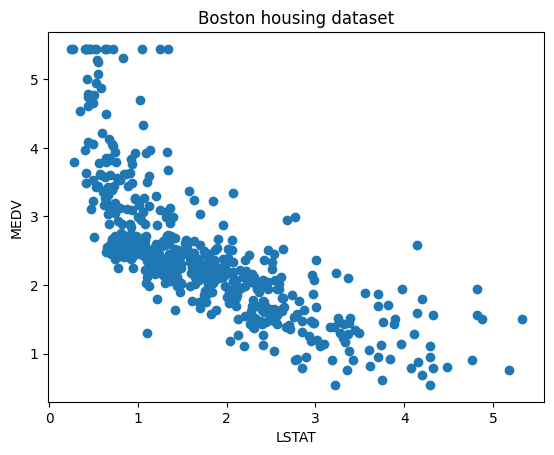

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.datasets import fetch_openml

boston = fetch_openml(name="boston", version=1, as_frame=False, parser='auto')

x = boston.data.astype(np.float64)
y = boston.target.astype(np.float64)

x = x[:, -1] / x[:, -1].std()
y = y / y.std()

plt.scatter(x, y)
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.title("Boston housing dataset")
plt.show()

In [11]:
# model tensors
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# data tensors
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# все тензоры являются leaf-tensors
# x и y не требуют вычисления градиентов
for vv in [w, b, x, y]:
    print(vv.is_leaf, vv.requires_grad)

True True
True True
True False
True False


# Линейная регрессия c помощью pytroch

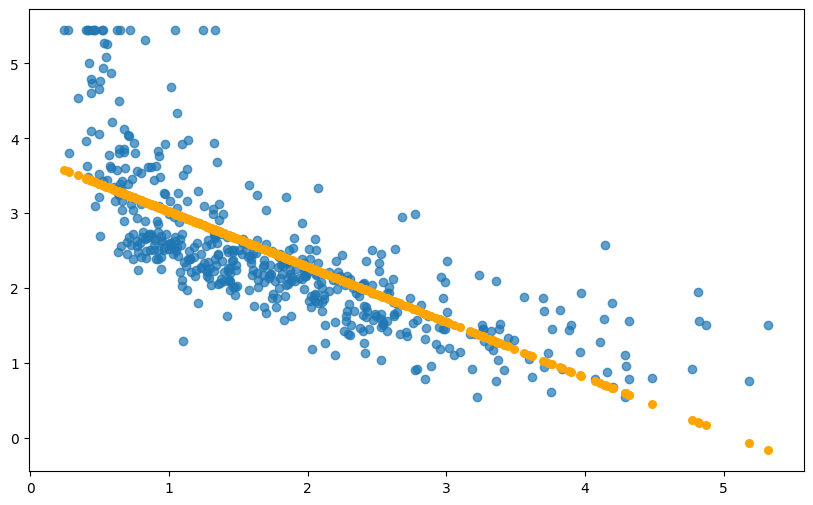

loss =  0.45585373


In [19]:
from IPython.display import clear_output

for i in range(1000):
    y_pred = w * x + b

    loss = torch.mean((y_pred - y) ** 2)

    loss.backward()

    w.data -= 0.05 * w.grad.data
    b.data -= 0.05 * b.grad.data

    w.grad.data.zero_()
    b.grad.data.zero_()

    if (i+1)%5 == 0:
        clear_output(wait=True)
        plt.figure(figsize=(10, 6))
        plt.scatter(x, y, alpha=0.7)
        plt.scatter(x, y_pred.data.numpy(), color='orange', s=30)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            break

# Optimizers

В этом примере мы пользовались простым правилом для градиентного спуска:
  
$$\theta^{n+1} = \theta^{n} - \alpha \nabla_{\theta}L$$


Единственным параметром в нем является $\alpha$ -- это `learning_rate`.

На практике часто используют различные модификации (например _Momentum_):

$$\theta^{n+1} = \theta^{n} - U^{n}\\
U^{n} = \gamma U^{n-1} + \alpha \nabla_{\theta}(L)
$$

Хороший обзор алгоритмов оптимизации для сетей можно посмотреть [тут](http://ruder.io/optimizing-gradient-descent/).



Pytorch предоставляет практически все широкораспространненные оптимизаторы:    
http://pytorch.org/docs/master/optim.html




Оптимизаторы удобны в использовании:

- требуется указать список переменных для оптимизации
- `opt.step()` применяет `update` ($U^{n}$) к весам
- `opt.zero_grad()` сбрасывает градиенты





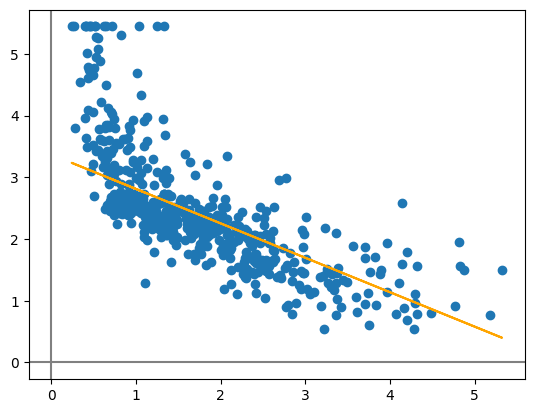

loss =  0.49351760745048523


In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.datasets import fetch_openml
from IPython.display import clear_output

boston = fetch_openml(name="boston", version=1, as_frame=False, parser='auto')

x = boston.data.astype(np.float64)
y = boston.target.astype(np.float64)

x = x[:, -1] / x[:, -1].std()
y = y / y.std()

x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

opt = torch.optim.RMSprop([w, b], lr=0.1)

for i in range(100):
    y_pred = w * x + b
    loss = torch.mean((y_pred - y) ** 2)

    opt.zero_grad()
    loss.backward()
    opt.step()

    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), y_pred.data.numpy(), color='orange')
        plt.show()

        print("loss = ", loss.item())
        if loss.item() < 0.5:

            break

# Немного более сложных тензоров (2 балла)

$$\rho(\theta) = (1 + 0.9 \cdot cos (8 \cdot \theta) ) \cdot (1 + 0.1 \cdot cos(24 \cdot \theta)) \cdot (0.9 + 0.05 \cdot cos(200 \cdot \theta)) \cdot (1 + sin(\theta))$$

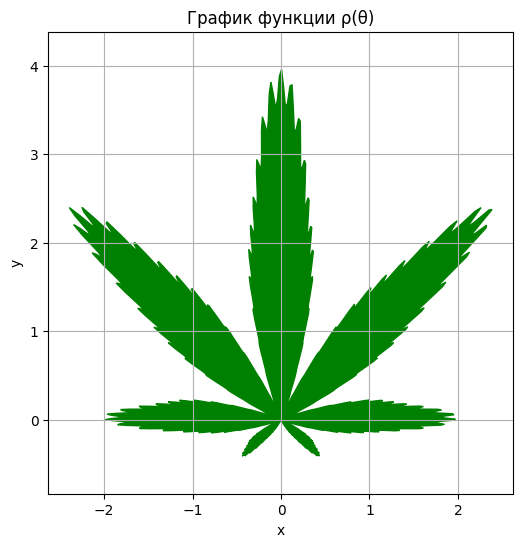

In [22]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t = torch.linspace(-np.pi, np.pi, steps=1000)

r = ((1 + 0.9 * torch.cos(8 * t)) *
       (1 + 0.1 * torch.cos(24 * t)) *
       (0.9 + 0.05 * torch.cos(200 * t)) *
       (1 + torch.sin(t)))

x = r * torch.cos(t)
y = r * torch.sin(t)

plt.figure(figsize=[6, 6])
plt.fill(x.numpy(), y.numpy(), color='green')
plt.grid()
plt.title('График функции ρ(θ)')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

## Highlevel-API (5 баллов)

При работе с нейронными сетями становится неудобно контролировать переменные с весами по-отдельности. Pytorch предоставляет высокоуровневый API для моделей http://pytorch.org/docs/master/nn.html#torch.nn.Module.


Чтобы воспользоваться моделью необходимо отнаследоваться от torch.nn.Module, определить слои и описать `forward`, `backward` будет вычислен автоматически.


Для демонстрации воспользуемся MNIST'ом.

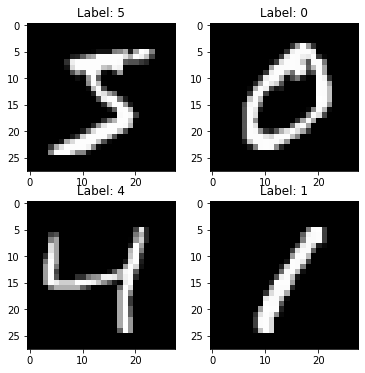

In [ ]:
# MNIST again
from util import load_mnist
X_train, y_train, X_val, y_val, X_test, y_test = load_mnist(flatten=True)

plt.figure(figsize=[6, 6])
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.title("Label: %i" % y_train[i])
    plt.imshow(X_train[i].reshape([28, 28]), cmap='gray');

А вот так уже в почти приличном мире описывают сетки. Приличный мир будет в следующей дз. Здесь строится сетка - классификатор

In [ ]:
# Higher-level API:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, hidden_size=40):
        super(Net, self).__init__()
        # создайте слои нейронки nn.Linear
        self.fc1 = # размером X_train.shape[1], hidden_size - входной слой
        self.fc2 = # hidden_size на hidden_size - скрытый слой
        self.fc3 = # подумайте какой размер слоя должен быть на выходе

    def forward(self, x):
        # применяем ReLU к внутренним слоям
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=-1)


SyntaxError: invalid syntax (<ipython-input-95-decfa672f91c>, line 9)

In [ ]:
# model interface:
model = Net()
tt = torch.from_numpy(X_train[:10, :].astype(np.float32))
output = model(tt)

print('Model outputs: \n', output)
probs = torch.softmax(output, dim=-1)
print('Probs: \n', probs)

pred = torch.argmax(probs, dim=-1, keepdim=True)
print('Pred: \n', pred.data.numpy())
print('Truth: \n', y_train[:10])

Model outputs: 
 tensor([[-2.0842, -2.4130, -2.2696, -2.3146, -2.3020, -2.3260, -2.4535, -2.3377,
         -2.2482, -2.3227],
        [-2.0842, -2.4193, -2.2245, -2.3634, -2.2744, -2.3142, -2.4680, -2.3039,
         -2.2897, -2.3353],
        [-2.0785, -2.3779, -2.2874, -2.3739, -2.3234, -2.2976, -2.4186, -2.3088,
         -2.2815, -2.3176],
        [-2.0763, -2.3828, -2.2854, -2.3528, -2.3107, -2.3034, -2.4229, -2.3241,
         -2.2892, -2.3180],
        [-2.0818, -2.3868, -2.2723, -2.3413, -2.3060, -2.3070, -2.4192, -2.3267,
         -2.2790, -2.3447],
        [-2.0720, -2.3996, -2.2738, -2.3502, -2.3157, -2.3129, -2.4185, -2.3261,
         -2.2724, -2.3272],
        [-2.0922, -2.3861, -2.2567, -2.3752, -2.3062, -2.3051, -2.4070, -2.3203,
         -2.2956, -2.3178],
        [-2.0800, -2.4138, -2.2491, -2.3134, -2.3083, -2.3630, -2.4207, -2.3507,
         -2.2597, -2.3119],
        [-2.0924, -2.3852, -2.2669, -2.3644, -2.3025, -2.2948, -2.4154, -2.3112,
         -2.2972, -2.3320],
  

Тренировка сети

Для тренировки сети нам требуется
- итератор по данным
- функция тренировки (прогон по данным, вычисление и применение градиентов)
- функция валидации (прогон по тестовым данным, вычисление метрик)

In [ ]:
from IPython.display import clear_output
from tqdm import trange

# функция для итераций по минибатчам, из первого семинара
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in trange(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

Обучаем также как и в случае линейной регрессии. Предсказываем результат по данным. Обучаем. В данном случае только функционал ошибки другой, не заморачивайтесь об этом. О вспомогательных функциях тоже не заморачивайтесь. Тут только надо знать что нейросети обучают батчами

In [ ]:
def train(model, optimizer, batchsize=32):
    loss_log = []
    model.train()
    for x_batch, y_batch in iterate_minibatches(X_train, y_train, batchsize=batchsize, shuffle=True):
        # data preparation
        data = torch.from_numpy(x_batch.astype(np.float32))
        target = torch.from_numpy(y_batch.astype(np.int64))

        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)

        # compute gradients
        # make a step

        loss = loss.item()
        loss_log.append(loss)
    return loss_log


def test(model):
    loss_log = []
    model.eval()
    for x_batch, y_batch in iterate_minibatches(X_val, y_val, batchsize=batchsize, shuffle=True):
        # data preparation
        data = torch.from_numpy(x_batch.astype(np.float32))
        target = torch.from_numpy(y_batch.astype(np.int64))

        output = model(data)
        loss = F.nll_loss(output, target)
        loss = loss.item()
        loss_log.append(loss)
    return loss_log


In [ ]:
def plot_history(train_history, val_history, title='loss'):
    clear_output(True)
    step = len(train_history) / len(val_history)
    plt.figure()
    plt.axhline(0, color='gray')
    plt.axvline(0, color='gray')
    plt.plot(np.arange(len(train_history)), train_history, color='orange',zorder=1)
    plt.scatter(np.arange(step, len(val_history) * step + step, step), val_history,zorder=2)
    plt.show()


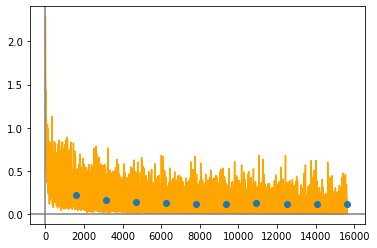

In [ ]:
train_log = []
val_log = []

model = Net()
opt = torch.optim.RMSprop(model.parameters(), lr=0.001)
batchsize = 32

for epoch in range(10):
    train_loss = train(model, opt, batchsize=batchsize)
    train_log.extend(train_loss)

    val_loss = np.mean(test(model))
    val_log.append(val_loss)
    plot_history(train_log, val_log)


## Метрики

Logloss -- величина, которую трудно интерпретировать.
Для отслеживания тренировки и сравнения моделей удобнее наблюдать за интерпретируемыми метриками, например точностью (accuracy)



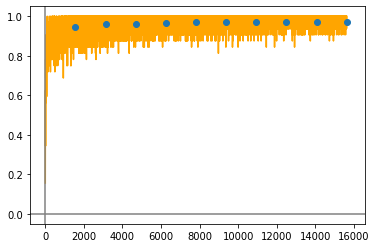

In [ ]:
def train(model, optimizer, batchsize=32):
    loss_log, acc_log = [], []
    model.train()
    for x_batch, y_batch in iterate_minibatches(X_train, y_train, batchsize=batchsize, shuffle=True):
        # data preparation
        data = torch.from_numpy(x_batch.astype(np.float32))
        target = torch.from_numpy(y_batch.astype(np.int64))

        optimizer.zero_grad()
        output = model(data)

        loss = F.nll_loss(output, target)

        # compute gradients
        # make a step

        loss = loss.item()
        loss_log.append(loss)

        probs = torch.softmax(output, dim=-1)
        pred = torch.argmax(probs, dim=-1, keepdim=True)
        acc_log.append(np.mean(pred.detach().numpy().flatten() == y_batch))
    return loss_log, acc_log


def test(model):
    loss_log, acc_log = [], []
    model.eval()
    for x_batch, y_batch in iterate_minibatches(X_val, y_val, batchsize=batchsize, shuffle=True):
        # data preparation
        data = torch.from_numpy(x_batch.astype(np.float32))
        target = torch.from_numpy(y_batch.astype(np.int64))

        output = model(data)
        loss = F.nll_loss(output, target)
        loss = loss.item()
        loss_log.append(loss)

        probs = torch.softmax(output, dim=-1)
        pred = torch.argmax(probs, dim=-1, keepdim=True)
        acc_log.append(np.mean(pred.detach().numpy().flatten() == y_batch))
    return loss_log, acc_log


train_log, train_acc_log = [], []
val_log, val_acc_log = [], []

model = Net()
opt = torch.optim.RMSprop(model.parameters(), lr=0.001)
batchsize = 32


train_log = []
val_log = []

model = Net()
opt = torch.optim.RMSprop(model.parameters(), lr=0.001)
batchsize = 32

for epoch in range(10):
    train_loss, train_acc = train(model, opt, batchsize=batchsize)
    train_log.extend(train_acc)

    val_loss, val_acc = test(model)
    val_log.append(np.mean(val_acc))

    plot_history(train_log, val_log, title = 'acc')
